# Summary statistics

`ScmRun` objects have methods specific to calculating summary statistics. In this notebook we demonstrate them.

At present, the following methods are available:

- `process_over`
- `quantiles_over`
- `groupby`
- `groupby_all_except`

In [1]:
# NBVAL_IGNORE_OUTPUT
import traceback

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scmdata.run import ScmRun, run_append

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option("display.width", 120)
pd.set_option("display.max_columns", 15)
pd.set_option("display.max_colwidth", 80)
pd.set_option("display.min_rows", 20)

## Helper bits and piecs

In [3]:
def new_timeseries(
    n=101,
    count=1,
    model="example",
    scenario="ssp119",
    variable="Surface Temperature",
    unit="K",
    region="World",
    cls=ScmRun,
    **kwargs,
):
    data = np.random.rand(n, count) * np.arange(n)[:, np.newaxis]
    index = 2000 + np.arange(n)
    return cls(
        data,
        columns={
            "model": model,
            "scenario": scenario,
            "variable": variable,
            "region": region,
            "unit": unit,
            **kwargs,
        },
        index=index,
    )

Let's create an `ScmRun` which contains a few variables and a number of runs. Such a dataframe would be used to store the results from an ensemble of simple climate model runs.

In [4]:
# NBVAL_IGNORE_OUTPUT
runs = run_append(
    [
        new_timeseries(
            count=3,
            variable=[
                "Surface Temperature",
                "Atmospheric Concentrations|CO2",
                "Radiative Forcing",
            ],
            unit=["K", "ppm", "W/m^2"],
            run_id=run_id,
        )
        for run_id in range(10)
    ]
)
runs.metadata["source"] = "fake data"
runs

<ScmRun (timeseries: 30, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model region  run_id scenario   unit                        variable
	0   example  World       0   ssp119      K             Surface Temperature
	1   example  World       0   ssp119    ppm  Atmospheric Concentrations|CO2
	2   example  World       0   ssp119  W/m^2               Radiative Forcing
	3   example  World       1   ssp119      K             Surface Temperature
	4   example  World       1   ssp119    ppm  Atmospheric Concentrations|CO2
	5   example  World       1   ssp119  W/m^2               Radiative Forcing
	6   example  World       2   ssp119      K             Surface Temperature
	7   example  World       2   ssp119    ppm  Atmospheric Concentrations|CO2
	8   example  World       2   ssp119  W/m^2               Radiative Forcing
	9   example  World       3   ssp119      K             Surface Temperature
	10  example  World       3   ssp119    ppm  Atmospheri

## `process_over`

The `process_over` method allows us to calculate a specific set of statistics on groups of timeseries. A number of pandas functions can be called including "sum", "mean" and "describe".

In [5]:
print(runs.process_over.__doc__)


        Process the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        operation : str or func
            The operation to perform.

            If a string is provided, the equivalent pandas groupby function is used. Note
            that not all groupby functions are available as some do not make sense for
            this particular application. Additional information about the arguments for
            the pandas groupby functions can be found at <https://pandas.pydata.org/pan
            das-docs/stable/reference/groupby.html>`_.

            If a function is provided, it will be applied to each group. The function must
            take a dataframe as its first argument and return a DataFrame, Series or scalar.

            Note that quantile means the value of the data at a given point in the cumulative
        

### Mean

In [6]:
# NBVAL_IGNORE_OUTPUT
mean = runs.process_over(cols="run_id", operation="mean")
mean

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature                    0.0    0.387714    0.820773    1.460097   
                        W/m^2 Radiative Forcing                      0.0    0.471181    0.893694    0.961170   
                        ppm   Atmospheric Concentrations|CO2         0.0    0.482120    1.001001    1.341380   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   K     Surface Temperature               2.292299    2.761013    3.273057  ...   50.721181   
                        W/m^2 Radiative Forcing                 2.289330    2.529391    3.119477  ...   45.050763   
                        ppm   Atmospheric Concentrations|CO2    2.760524    3.420984    2.545195  ...   43.490703   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature              39.219170   66.435220   38.537626   63.774762   
                        W/m^2 Radiative Forcing                43.192101   48.592799   43.668887   42.174029   
                        ppm   Atmospheric Concentrations|CO2   48.201622   56.307773   32.502564   55.804484   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   K     Surface Temperature              34.285490   36.371540  
                        W/m^2 Radiative Forcing                48.425890   40.288414  
                        ppm   Atmospheric Concentrations|CO2   35.773002   34.718202  

[3 rows x 101 columns]

### Median

In [7]:
# NBVAL_IGNORE_OUTPUT
median = runs.process_over(cols="run_id", operation="median")
median

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature                    0.0    0.324150    0.819582    1.212012   
                        W/m^2 Radiative Forcing                      0.0    0.425197    0.670153    0.859357   
                        ppm   Atmospheric Concentrations|CO2         0.0    0.678151    1.114894    1.676937   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   K     Surface Temperature               2.412381    3.266539    2.858459  ...   51.121634   
                        W/m^2 Radiative Forcing                 2.223959    2.739940    3.485002  ...   43.763388   
                        ppm   Atmospheric Concentrations|CO2    3.188839    3.475027    2.019825  ...   54.074519   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature              37.374708   76.663567   37.892977   77.373607   
                        W/m^2 Radiative Forcing                35.377469   51.078944   48.289710   32.230922   
                        ppm   Atmospheric Concentrations|CO2   57.259650   68.107381   29.153699   58.813122   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   K     Surface Temperature              38.708996   18.593436  
                        W/m^2 Radiative Forcing                43.325290   25.841279  
                        ppm   Atmospheric Concentrations|CO2   30.939810   35.079705  

[3 rows x 101 columns]

### Arbitrary functions

You are also able to run arbitrary functions for each group

In [8]:
# NBVAL_IGNORE_OUTPUT
def mean_and_invert(df, axis=0):
    # Take a mean across the group and then invert the result
    return -df.mean(axis=axis)


runs.process_over("run_id", operation=mean_and_invert)

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature                   -0.0   -0.387714   -0.820773   -1.460097   
                        W/m^2 Radiative Forcing                     -0.0   -0.471181   -0.893694   -0.961170   
                        ppm   Atmospheric Concentrations|CO2        -0.0   -0.482120   -1.001001   -1.341380   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   K     Surface Temperature              -2.292299   -2.761013   -3.273057  ...  -50.721181   
                        W/m^2 Radiative Forcing                -2.289330   -2.529391   -3.119477  ...  -45.050763   
                        ppm   Atmospheric Concentrations|CO2   -2.760524   -3.420984   -2.545195  ...  -43.490703   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature             -39.219170  -66.435220  -38.537626  -63.774762   
                        W/m^2 Radiative Forcing               -43.192101  -48.592799  -43.668887  -42.174029   
                        ppm   Atmospheric Concentrations|CO2  -48.201622  -56.307773  -32.502564  -55.804484   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   K     Surface Temperature             -34.285490  -36.371540  
                        W/m^2 Radiative Forcing               -48.425890  -40.288414  
                        ppm   Atmospheric Concentrations|CO2  -35.773002  -34.718202  

[3 rows x 101 columns]

In [9]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", operation=mean_and_invert, axis=1)

model    region  run_id  scenario  unit   variable                      
example  World   0       ssp119    K      Surface Temperature              -25.451925
                 1       ssp119    K      Surface Temperature              -23.203157
                 2       ssp119    K      Surface Temperature              -24.429274
                 3       ssp119    K      Surface Temperature              -22.956321
                 4       ssp119    K      Surface Temperature              -23.126748
                 5       ssp119    K      Surface Temperature              -26.118794
                 6       ssp119    K      Surface Temperature              -27.002551
                 7       ssp119    K      Surface Temperature              -24.704586
                 8       ssp119    K      Surface Temperature              -28.103281
                 9       ssp119    K      Surface Temperature              -27.052078
                 0       ssp119    W/m^2  Radiative Forcing        

### Other quantiles

In [10]:
# NBVAL_IGNORE_OUTPUT
lower_likely_quantile = runs.process_over(
    cols="run_id", operation="quantile", q=0.17
)
lower_likely_quantile

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature                    0.0    0.134883    0.249345    0.808475   
                        W/m^2 Radiative Forcing                      0.0    0.199761    0.277796    0.340835   
                        ppm   Atmospheric Concentrations|CO2         0.0    0.090965    0.494079    0.383849   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   K     Surface Temperature               1.504262    1.047422    1.241987  ...   23.976507   
                        W/m^2 Radiative Forcing                 1.875573    0.862542    0.568237  ...   20.017666   
                        ppm   Atmospheric Concentrations|CO2    1.610640    2.685620    0.679447  ...    5.374440   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature               9.218116   46.734409   20.968468   28.587334   
                        W/m^2 Radiative Forcing                17.071540   18.958428    4.358143   27.454227   
                        ppm   Atmospheric Concentrations|CO2   14.653974   18.357817   16.006693   33.133871   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   K     Surface Temperature              19.559636    9.292692  
                        W/m^2 Radiative Forcing                18.881347    4.152874  
                        ppm   Atmospheric Concentrations|CO2    3.499228   19.175468  

[3 rows x 101 columns]

## `quantiles_over`

If you want to calculate more than one summary statistic, `quantiles_over` will calculate and label multiple summary statistics before returning them.

In [11]:
print(runs.quantiles_over.__doc__)


        Calculate quantiles of the data over the input columns.

        Parameters
        ----------
        cols
            Columns to perform the operation on. The timeseries will be grouped by all
            other columns in :attr:`meta`.

        quantiles
            The quantiles to calculate. This should be a list of quantiles to calculate
            (quantile values between 0 and 1). ``quantiles`` can also include the strings
            "median" or "mean" if these values are to be calculated.

        **kwargs
            Passed to :meth:`~ScmRun.process_over`.

        Returns
        -------
        :class:`pandas.DataFrame`
            The quantiles of the timeseries, grouped by all columns in :attr:`meta`
            other than :obj:`cols`. Each calculated quantile is given a label which is
            stored in the ``quantile`` column within the output index.

        Raises
        ------
        TypeError
            ``operation`` is included in ``kwargs``. The op

In [12]:
# NBVAL_IGNORE_OUTPUT
summary_stats = runs.quantiles_over(
    cols="run_id", quantiles=[0.05, 0.17, 0.5, 0.83, 0.95, "mean", "median"]
)
summary_stats

time                                                                   2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                       quantile                                                   
example World  ssp119   K     Surface Temperature            0.05             0.0    0.065798    0.113757    0.380725   
                        W/m^2 Radiative Forcing              0.05             0.0    0.169302    0.173575    0.110773   
                        ppm   Atmospheric Concentrations|CO2 0.05             0.0    0.075638    0.392356    0.217716   
                        K     Surface Temperature            0.17             0.0    0.134883    0.249345    0.808475   
                        W/m^2 Radiative Forcing              0.17             0.0    0.199761    0.277796    0.340835   
                        ppm   Atmospheric Concentrations|CO2 0.17             0.0    0.090965    0.494079    0.383849   
                        K     Surface Temperature            0.5              0.0    0.324150    0.819582    1.212012   
                        W/m^2 Radiative Forcing              0.5              0.0    0.425197    0.670153    0.859357   
                        ppm   Atmospheric Concentrations|CO2 0.5              0.0    0.678151    1.114894    1.676937   
                        K     Surface Temperature            0.83             0.0    0.616121    1.392436    2.295926   
                        W/m^2 Radiative Forcing              0.83             0.0    0.771103    1.724114    1.632854   
                        ppm   Atmospheric Concentrations|CO2 0.83             0.0    0.778655    1.414690    1.872569   
                        K     Surface Temperature            0.95             0.0    0.766950    1.549128    2.535102   
                        W/m^2 Radiative Forcing              0.95             0.0    0.895799    1.969210    1.874810   
                        ppm   Atmospheric Concentrations|CO2 0.95             0.0    0.803249    1.640959    2.491854   
                        K     Surface Temperature            mean             0.0    0.387714    0.820773    1.460097   
                        W/m^2 Radiative Forcing              mean             0.0    0.471181    0.893694    0.961170   
                        ppm   Atmospheric Concentrations|CO2 mean             0.0    0.482120    1.001001    1.341380   
                        K     Surface Temperature            median           0.0    0.324150    0.819582    1.212012   
                        W/m^2 Radiative Forcing              median           0.0    0.425197    0.670153    0.859357   
                        ppm   Atmospheric Concentrations|CO2 median           0.0    0.678151    1.114894    1.676937   

time                                                                   2004-01-01  2005-01-01  2006-01-01  ...  \
model   region scenario unit  variable                       quantile                                      ...   
example World  ssp119   K     Surface Temperature            0.05        1.180999    0.154970    0.536731  ...   
                        W/m^2 Radiative Forcing              0.05        1.198040    0.593744    0.295484  ...   
                        ppm   Atmospheric Concentrations|CO2 0.05        0.471777    1.754452    0.290510  ...   
                        K     Surface Temperature            0.17        1.504262    1.047422    1.241987  ...   
                        W/m^2 Radiative Forcing              0.17        1.875573    0.862542    0.568237  ...   
                        ppm   Atmospheric Concentrations|CO2 0.17        1.610640    2.685620    0.679447  ...   
                        K     Surface Temperature            0.5         2.412381    3.266539    2.858459  ...   
                        W/m^2 Radiative Forcing              0.5         2.223959    2.739940    3.485002  ...   
                        ppm   Atmospheric Concentrations|CO2 0.5         3.1

### Plotting

#### Calculate quantiles within plotting function

We can use `plumeplot` directly to plot quantiles. This will calculate the quantiles as part of making the plot so if you're doing this lots it might be faster to pre-calculate the quantiles, then make the plot instead (see below)

Note that in this case the default setttings in `plumeplot` don't produce anything that helpful, we show how to modify them in the cell below.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f5cfe3da7f0>])

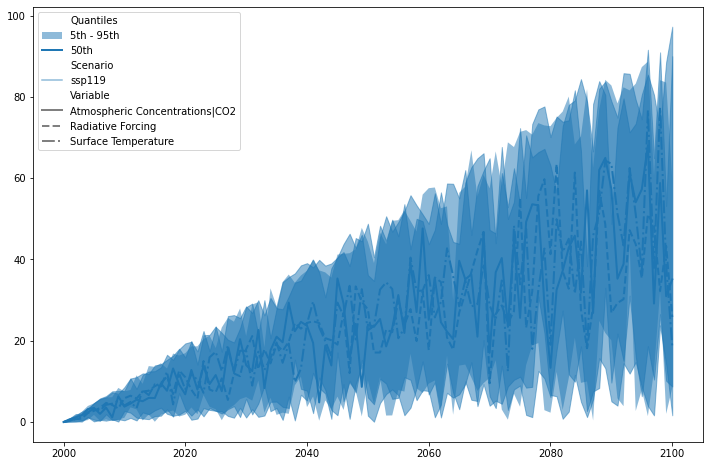

In [13]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(quantile_over="run_id")

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f5cfdd77f10>])

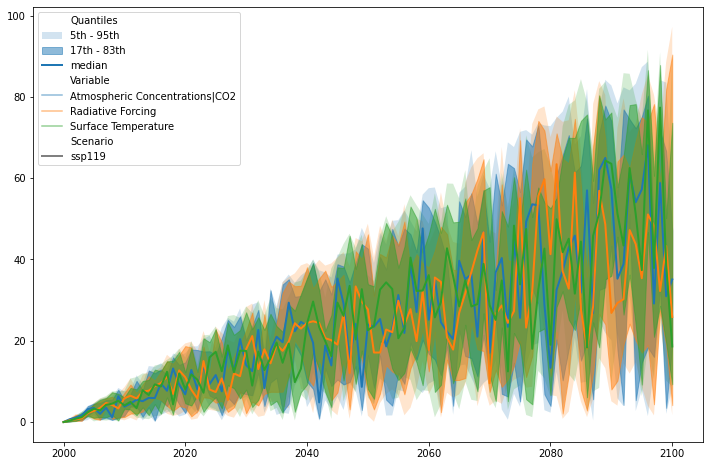

In [14]:
# NBVAL_IGNORE_OUTPUT
runs.plumeplot(
    quantile_over="run_id",
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
)

#### Pre-calculated quantiles

Alternately, we can cast the output of `quantiles_over` to an `ScmRun` object for ease of filtering and plotting.

In [15]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun = ScmRun(summary_stats)
summary_stats_scmrun

<ScmRun (timeseries: 21, timepoints: 101)>
Time:
	Start: 2000-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	      model quantile region scenario   unit                        variable
	0   example     0.05  World   ssp119      K             Surface Temperature
	1   example     0.05  World   ssp119  W/m^2               Radiative Forcing
	2   example     0.05  World   ssp119    ppm  Atmospheric Concentrations|CO2
	3   example     0.17  World   ssp119      K             Surface Temperature
	4   example     0.17  World   ssp119  W/m^2               Radiative Forcing
	5   example     0.17  World   ssp119    ppm  Atmospheric Concentrations|CO2
	6   example      0.5  World   ssp119      K             Surface Temperature
	7   example      0.5  World   ssp119  W/m^2               Radiative Forcing
	8   example      0.5  World   ssp119    ppm  Atmospheric Concentrations|CO2
	9   example     0.83  World   ssp119      K             Surface Temperature
	10  example     0.83  World   ssp119  W/m^2

As discussed above, casting the output of `quantiles_over` to an `ScmRun` object helps avoid repeatedly calculating the quantiles.

(<AxesSubplot:>,
  <matplotlib.lines.Line2D at 0x7f5cfe144970>])

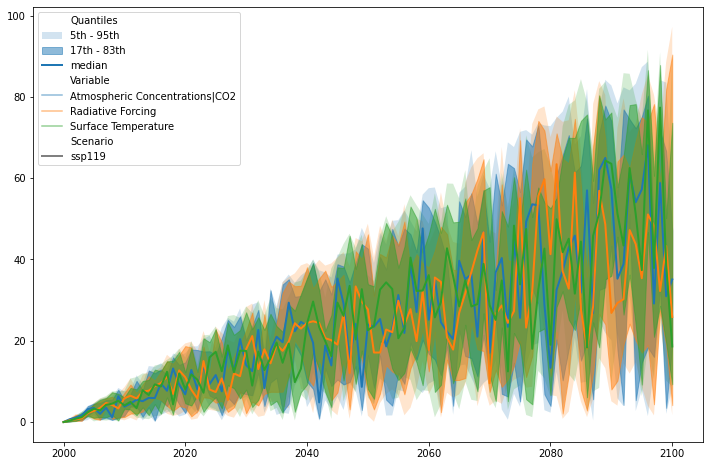

In [16]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.plumeplot(
    quantiles_plumes=[
        ((0.05, 0.95), 0.2),
        ((0.17, 0.83), 0.5),
        (("median",), 1.0),
    ],
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    pre_calculated=True,
)

If we don't want a plume plot, we can always our standard lineplot method.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

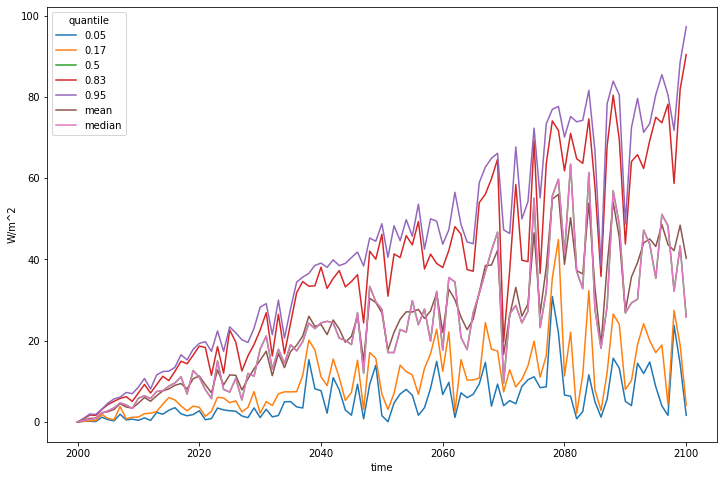

In [17]:
# NBVAL_IGNORE_OUTPUT
summary_stats_scmrun.filter(variable="Radiative Forcing").lineplot(
    hue="quantile"
)

## `groupby`

The `groupby` method allows us to group the data by columns in `scmrun.meta` and then perform operations. An example is given below.

In [18]:
# NBVAL_IGNORE_OUTPUT
variable_means = []
for vdf in runs.groupby("variable"):
    vdf_mean = vdf.timeseries().mean(axis=0)
    vdf_mean.name = vdf.get_unique_meta("variable", True)
    variable_means.append(vdf_mean)

pd.DataFrame(variable_means)

time,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,...,2094-01-01,2095-01-01,2096-01-01,2097-01-01,2098-01-01,2099-01-01,2100-01-01
Atmospheric Concentrations|CO2,0.0,0.482120,1.001001,1.341380,2.760524,3.420984,2.545195,...,43.490703,48.201622,56.307773,32.502564,55.804484,35.773002,34.718202
Radiative Forcing,0.0,0.471181,0.893694,0.961170,2.289330,2.529391,3.119477,...,45.050763,43.192101,48.592799,43.668887,42.174029,48.425890,40.288414
Surface Temperature,0.0,0.387714,0.820773,1.460097,2.292299,2.761013,3.273057,...,50.721181,39.219170,66.435220,38.537626,63.774762,34.285490,36.371540


## `groupby_all_except`

The `groupby_all_except` method allows us to group the data by all columns in `scmrun.meta` except for a certain set. Like with `groupby`, we can then use the groups to perform operations. An example is given below. Note that, in most cases, using `process_over` is likely to be more useful. 

In [19]:
# NBVAL_IGNORE_OUTPUT
ensemble_means = []
for edf in runs.groupby_all_except("run_id"):
    edf_mean = edf.timeseries().mean(axis=0)
    edf_mean.name = edf.get_unique_meta("variable", True)
    ensemble_means.append(edf_mean)

pd.DataFrame(ensemble_means)

time,2000-01-01,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,...,2094-01-01,2095-01-01,2096-01-01,2097-01-01,2098-01-01,2099-01-01,2100-01-01
Surface Temperature,0.0,0.387714,0.820773,1.460097,2.292299,2.761013,3.273057,...,50.721181,39.219170,66.435220,38.537626,63.774762,34.285490,36.371540
Radiative Forcing,0.0,0.471181,0.893694,0.961170,2.289330,2.529391,3.119477,...,45.050763,43.192101,48.592799,43.668887,42.174029,48.425890,40.288414
Atmospheric Concentrations|CO2,0.0,0.482120,1.001001,1.341380,2.760524,3.420984,2.545195,...,43.490703,48.201622,56.307773,32.502564,55.804484,35.773002,34.718202


As we said, in most cases using `process_over` is likely to be more useful. For example the above can be done using `process_over` in one line (and more metadata is retained).

In [20]:
# NBVAL_IGNORE_OUTPUT
runs.process_over("run_id", "mean")

time                                                          2000-01-01  2001-01-01  2002-01-01  2003-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature                    0.0    0.387714    0.820773    1.460097   
                        W/m^2 Radiative Forcing                      0.0    0.471181    0.893694    0.961170   
                        ppm   Atmospheric Concentrations|CO2         0.0    0.482120    1.001001    1.341380   

time                                                          2004-01-01  2005-01-01  2006-01-01  ...  2094-01-01  \
model   region scenario unit  variable                                                            ...               
example World  ssp119   K     Surface Temperature               2.292299    2.761013    3.273057  ...   50.721181   
                        W/m^2 Radiative Forcing                 2.289330    2.529391    3.119477  ...   45.050763   
                        ppm   Atmospheric Concentrations|CO2    2.760524    3.420984    2.545195  ...   43.490703   

time                                                          2095-01-01  2096-01-01  2097-01-01  2098-01-01  \
model   region scenario unit  variable                                                                         
example World  ssp119   K     Surface Temperature              39.219170   66.435220   38.537626   63.774762   
                        W/m^2 Radiative Forcing                43.192101   48.592799   43.668887   42.174029   
                        ppm   Atmospheric Concentrations|CO2   48.201622   56.307773   32.502564   55.804484   

time                                                          2099-01-01  2100-01-01  
model   region scenario unit  variable                                                
example World  ssp119   K     Surface Temperature              34.285490   36.371540  
                        W/m^2 Radiative Forcing                48.425890   40.288414  
                        ppm   Atmospheric Concentrations|CO2   35.773002   34.718202  

[3 rows x 101 columns]